## Music Mood Classification Using Random Forests

### Reading the Training Dataset

In [1]:
import pandas as pd

df_train = pd.read_csv('../dataset/train_lyrics_1000.csv')
df_test = pd.read_csv('../dataset/valid_lyrics_200.csv')

df_train.tail()

,file,artist,title,lyrics,genre,mood,year
995,TRBIGRY128F42597B3.h5,Sade,All About Our Love,Its all about our love\nSo shall it be forever...,R&B,sad,2000
996,TRBIIEU128F9307C88.h5,New Found Glory,Don't Let Her Pull You Down,It's time that I rain on your parade\nWatch as...,Rock,happy,2009
997,TRBIIJY12903CE4755.h5,Mindy McCready,Ten Thousand Angels,Speakin of the devil\nLook who just walked in\...,Country,happy,1996
998,TRBIIOT128F423C594.h5,Joy Division,Leaders Of Men,Born from some mother's womb\nJust like any ot...,Rock,sad,1978
999,TRBIJYB128F14AE326.h5,Seventh Day Slumber,Shattered Life,"This wanting more from me is tearing me, it's ...",Rock,sad,2005


In [2]:
X_train = df_train['lyrics']
y_train = df_train['mood']

X_test = df_test['lyrics']
y_test = df_test['mood']

In [3]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

print('before: %s ...' %y_train[:5])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

print('after: %s ...' %y_train[:5])
print('after: %s ...' %y_test[:5])

before: 0      sad
1    happy
2      sad
3    happy
4      sad
Name: mood, dtype: object ...
after: [1 0 1 0 1] ...
after: [0 1 0 1 1] ...


#### Text Preprocessing

In [4]:
import pickle
stop_words = pickle.load(open('../dataset/stopwords.p', 'rb'))
semantic_words = pickle.load(open('../dataset/semantic_words_py34.p', 'rb'))

### Transform texts into bag of words models - Trying different tokenizers

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

In [6]:
tokenizer_whitelist

<function __main__.<lambda>(text)>

### Looking at vocabulary sizes

In [7]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.preprocessing import DenseTransformer

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  

vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  

vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)
vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                          tokenizer=tokenizer_snowball_wl)
pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', RandomForestClassifier(n_estimators=100))]))

In [8]:
# done before max_features was set

print('Vocabulary sizes\n')
labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]

for label, v in zip(labels, vectorizers):
    v.fit(X_train)
    print('%s: %s' % (label, len(v.vocabulary_)))

Vocabulary sizes

CountVec: 11378


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVec porter: 8551


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVec snowball: 8528
CountVec wl: 1666
CountVec porter+wl: 1349
CountVec snowball+wl: 1332
TfidfVec: 11378
TfidfVec porter: 8551
TfidfVec snowball: 8528
TfidfVec wl: 1666
TfidfVec porter+wl: 1349
TfidfVec snowball+wl: 1332


### Model Selection

#### Feature Extraction - Cross Validation Error

In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]



d = {'Data':labels,
     'ROC AUC (%)':[],}

for i,clf in enumerate(pipelines):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring='roc_auc', cv=10)
    print('clf %s, %s: %s' % (i+1, labels[i], scores.mean()*100))
    d['ROC AUC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

clf 1, CountVec: 72.86912960776596


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

clf 2, CountVec porter: 73.87225501770956


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'o

clf 3, CountVec snowball: 73.31860160041977
clf 4, CountVec wl: 66.39617604617605
clf 5, CountVec porter+wl: 69.71947396038306
clf 6, CountVec snowball+wl: 69.6760199396563
clf 7, TfidfVec: 70.65416174734358


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

clf 8, TfidfVec porter: 74.65897940443395


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'o

clf 9, TfidfVec snowball: 72.40260396169487
clf 10, TfidfVec wl: 66.74460186278368
clf 11, TfidfVec porter+wl: 69.32526564344747
clf 12, TfidfVec snowball+wl: 67.95611963793783


In [10]:
df_perform = pd.DataFrame(d)
df_perform = df_perform['ROC AUC (%)']
df_perform.index=(labels)
df_perform

CountVec                72.87 (+/- 3.80)
CountVec porter         73.87 (+/- 4.15)
CountVec snowball       73.32 (+/- 4.70)
CountVec wl             66.40 (+/- 5.05)
CountVec porter+wl      69.72 (+/- 4.52)
CountVec snowball+wl    69.68 (+/- 4.28)
TfidfVec                70.65 (+/- 4.28)
TfidfVec porter         74.66 (+/- 5.14)
TfidfVec snowball       72.40 (+/- 3.66)
TfidfVec wl             66.74 (+/- 5.98)
TfidfVec porter+wl      69.33 (+/- 4.75)
TfidfVec snowball+wl    67.96 (+/- 5.53)
Name: ROC AUC (%), dtype: object

In [11]:
df_perform.to_csv('../dataset/rand_forest_featextr_1.csv', index=False)

### ROC Curve

In [12]:
%matplotlib inline

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


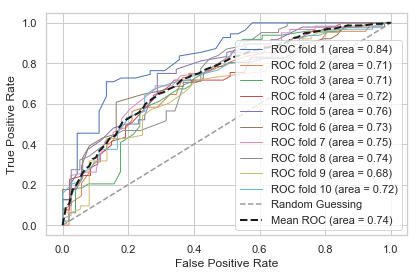

In [13]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

classifier = Pipeline([('vect',   TfidfVectorizer(binary=False,
                                             stop_words=stop_words,
                                             ngram_range=(1,1),
                                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                                             max_features = 5000,
                                             tokenizer=lambda text: [porter.stem(word) for word in text.split()]
                )),
                ('dense', DenseTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100))])


cv = KFold(n_splits=10, random_state=None, shuffle= False)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
mean =[]

for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean.append(interp(mean_fpr, fpr, tpr))
    mean[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')

mean_tpr = np.mean(mean, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.savefig('../dataset/roc_tfidf_porter_1.png', dpi=300)
plt.legend(loc="lower right")

plt.show()

## Hyperparameter Tuning

In [14]:
vect = TfidfVectorizer(binary=False,
                       stop_words=stop_words,
                       ngram_range=(1,1),
                       preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                       tokenizer=lambda text: [porter.stem(word) for word in text.split()])

### Effect of the number of estimators

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

pipe_1 = Pipeline([
                ('vect',   vect),
                ('dense', DenseTransformer()),
                ('clf', RandomForestClassifier(n_estimators=50))])

pipe_2 = Pipeline([
                ('vect',   vect),
                ('dense', DenseTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100))])

pipe_3 = Pipeline([
                ('vect',   vect),
                ('dense', DenseTransformer()),
                ('clf', RandomForestClassifier(n_estimators=200))])

pipe_4 = Pipeline([
                ('vect',   vect),
                ('dense', DenseTransformer()),
                ('clf', RandomForestClassifier(n_estimators=400))])

labels = [50, 100, 200, 400]

for i,clf in enumerate([pipe_1, pipe_2, pipe_3, pipe_4]):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring='roc_auc', cv=10)
    print('clf %s, %s: %0.2f (+/- %0.2f)' % (i+1, labels[i], scores.mean()*100, scores.std()*100))

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

clf 1, 50: 71.31 (+/- 2.88)


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

clf 2, 100: 72.61 (+/- 3.51)


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

clf 3, 200: 73.81 (+/- 3.46)


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

clf 4, 400: 74.56 (+/- 4.22)


### GridSearch

In [16]:
X_train_feat = vect.fit_transform(X_train, y_train)
X_train_feat = X_train_feat.toarray()
X_train_feat

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


clf_2 = RandomForestClassifier(n_estimators=50)


tuned_parameters = [
  {'criterion': ['gini', 'entropy'], 
   'max_features': ['auto', 'log2', 'sqrt'],
   'min_samples_split':[2,3], 
   'min_samples_leaf':[1,2]},
 ]


grid_search_1 = GridSearchCV(clf_2, 
                           tuned_parameters, 
                           n_jobs=1, 
                           scoring='roc_auc',
                           cv=10
                )

grid_search_1.fit(X_train_feat, y_train)

print("Best parameters set found on development set:")
print()
print(grid_search_1.best_estimator_)
print()
print("Grid scores on development set:")
print()
for params in grid_search_1.cv_results_:
    a = "%0.3f (+/-%0.03f) for %r"
    % params
for scores in grid_search_1.cv_results_:
    b = "%0.3f (+/-%0.03f) for %r"
    % scores.std() / 2
for mean_score in grid_search_1.cv_results_:
    c = "%0.3f (+/-%0.03f) for %r"
    % mean_score
print(a)

Best parameters set found on development set:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Grid scores on development set:



UsageError: Line magic function `%` not found.


In [18]:
import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title, dest):

    cm = metrics.confusion_matrix(y, grid_search_1.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig(dest, dpi=300)
    plt.show()

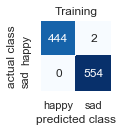

In [21]:
grid_search_1 = pipe_4 # Tfidf + porter

grid_search_1.fit(X_train, y_train)

plot_cm(X_train, y_train, grid_search_1, 'Training', '../dataset/confmat_tfidf_porter_train.png')

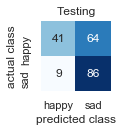

In [22]:
plot_cm(X_test, y_test, grid_search_1, 'Testing', '../dataset/confmat_tfidf_porter_test.png')

## Validation

In [65]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [66]:
labels = ['Train CountVec', 'Train CountVec porter', 'Train CountVec snowball', 'Train CountVec wl', 
          'Train CountVec porter+wl','Train CountVec snowball+wl',
          'Train TfidfVec', 'Train TfidfVec porter', 'Train TfidfVec snowball', 'Train TfidfVec wl', 
          'Train TfidfVec porter+wl','Train TfidfVec snowball+wl',
          'Test CountVec', 'Test CountVec porter', 'Test CountVec snowball', 'Test CountVec wl', 
          'Test CountVec porter+wl','Test CountVec snowball+wl',
          'Test TfidfVec', 'Test TfidfVec porter', 'Test TfidfVec snowball', 'Test TfidfVec wl', 
          'Test TfidfVec porter+wl','Test TfidfVec snowball+wl',]

d = {'Data':labels,
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}


for clf in pipelines:
    clf.fit(X_train, y_train)

for clf in pipelines:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_train, y_true=y_train))

for clf in pipelines:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_test, y_true=y_test))

In [67]:
pd.set_option('precision', 2)

df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(labels)
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
Train CountVec,99.8,100.00,99.55,99.78,99.78
Train CountVec porter,99.8,99.78,99.78,99.78,99.80
Train CountVec snowball,99.8,100.00,99.55,99.78,99.78
Train CountVec wl,99.5,100.00,98.88,99.44,99.44
Train CountVec porter+wl,99.5,99.77,99.10,99.44,99.46
Train CountVec snowball+wl,99.5,100.00,98.88,99.44,99.44
Train TfidfVec,99.8,100.00,99.55,99.78,99.78
Train TfidfVec porter,99.8,99.55,100.00,99.78,99.82
Train TfidfVec snowball,99.8,100.00,99.55,99.78,99.78
Train TfidfVec wl,99.4,99.33,99.33,99.33,99.39


In [ ]:
df_perform.to_csv('../dataset/RANDOM_FOREST_clf_performance.csv', index_label=False, float_format='%2.2f')